In [83]:
import pandas as pd
import calendar
from datetime import datetime

pd.set_option('display.max_rows', 100)

In [2]:
train = pd.read_csv('DF914_data.csv', encoding='ISO-8859-1')

/Users/wonhee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,OriginalState,State,Country,Phone,Real Email,Notes,Opt Out,LastPurchaseDate,FirstPurchaseDate
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,PA,US,NaN,NaN,NaN,NaN,2019-03-15 18:36,2017-06-01 9:44
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,KY,US,NaN,NaN,NaN,NaN,2019-07-18 1:49,2017-06-23 12:57
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,FL,US,NaN,NaN,NaN,NaN,2018-06-17 16:16,2017-06-16 6:59
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,California,CA,US,NaN,NaN,NaN,NaN,2018-01-11 17:47,2017-06-27 21:02
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,UT,US,NaN,NaN,NaN,NaN,2019-07-16 10:10,2017-06-27 16:31


In [4]:
train.shape

(38150, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38150 entries, 0 to 38149
Data columns (total 16 columns):
ClientId                                 38149 non-null float64
# of Orders Placed                       38067 non-null float64
# Different products (SKUs) purchased    38067 non-null float64
# of Items Purchased                     38067 non-null float64
Max Orders for one SKU                   38067 non-null float64
Total Value of all Orders Placed         38067 non-null object
City                                     38143 non-null object
OriginalState                            38139 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
Phone                                    0 non-null float64
Real Email                               1 non-null float64
Notes                                    2 non-null object
Opt Out                                  1 non-null object
LastPurchaseDate  

In [6]:
# Looking for columns with any missing values
train.isnull().sum()

ClientId                                     1
# of Orders Placed                          83
# Different products (SKUs) purchased       83
# of Items Purchased                        83
Max Orders for one SKU                      83
Total Value of all Orders Placed            83
City                                         7
OriginalState                               11
State                                        8
Country                                      8
Phone                                    38150
Real Email                               38149
Notes                                    38148
Opt Out                                  38149
LastPurchaseDate                             1
FirstPurchaseDate                            1
dtype: int64

In [8]:
# Looking for any columns that have values of 0
zero = (train == 0).astype(int).sum()
zero

ClientId                                 0
# of Orders Placed                       0
# Different products (SKUs) purchased    0
# of Items Purchased                     0
Max Orders for one SKU                   0
Total Value of all Orders Placed         0
City                                     0
OriginalState                            0
State                                    0
Country                                  0
Phone                                    0
Real Email                               0
Notes                                    0
Opt Out                                  0
LastPurchaseDate                         0
FirstPurchaseDate                        0
dtype: int64

In [9]:
# Looking for columns that have any missing value(This is another way to look, but this method doesnt show the numbers missing)
columns_null = train.columns[train.isnull().any()]
columns_null

Index(['ClientId', '# of Orders Placed',
       '# Different products (SKUs) purchased', '# of Items Purchased',
       'Max Orders for one SKU', 'Total Value of all Orders Placed', 'City',
       'OriginalState', 'State', 'Country', 'Phone', 'Real Email', 'Notes',
       'Opt Out', 'LastPurchaseDate', 'FirstPurchaseDate'],
      dtype='object')

In [10]:
# Dropped the following columns because it didnt seem necessary in the analysis and there were 99% missing 
train = train.drop(['Phone', 'Real Email', 'Notes', 'Opt Out', 'OriginalState'], axis=1)

In [12]:
train.isnull().sum()

ClientId                                  1
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      7
State                                     8
Country                                   8
LastPurchaseDate                          1
FirstPurchaseDate                         1
dtype: int64

In [13]:
train[train['ClientId'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
29238,NaN,1.0,1.0,1.0,12.75,Adriï¿?Guixï¿?y Anna Cardï¿?Adriï¿?Guixï¿?y An...,30269-1090,NaN,NaN,NaN,NaN


In [14]:
# Dropped this row because it had nearly all missing values except for the numerical values, didnt seem like it would help in any way
train = train.dropna(how='any', subset=['ClientId'])

In [15]:
train.isnull().sum()

ClientId                                  0
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      7
State                                     7
Country                                   7
LastPurchaseDate                          0
FirstPurchaseDate                         0
dtype: int64

In [16]:
train[train['City'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
5505,12773.0,1.0,1.0,1.0,1.0,14.98,NaN,NaN,NaN,2018-04-11 12:48,2018-04-11 12:48
16701,26063.0,2.0,2.0,2.0,1.0,24.98,NaN,NaN,NaN,2018-12-10 15:21,2018-11-27 23:31
18537,28048.0,7.0,2.0,7.0,5.0,96.49,NaN,NaN,NaN,2019-05-07 23:03,2018-12-23 3:41
26765,36985.0,1.0,1.0,1.0,1.0,13.99,NaN,NaN,NaN,2019-03-26 12:59,2019-03-26 12:59
29097,39569.0,1.0,1.0,1.0,1.0,13.99,NaN,NaN,NaN,2019-04-23 17:30,2019-04-23 17:30
29399,39926.0,1.0,1.0,1.0,1.0,33.79,NaN,NaN,NaN,2019-04-28 17:02,2019-04-28 17:02
35178,46531.0,1.0,1.0,2.0,1.0,127.98,NaN,NaN,NaN,2019-07-13 16:34,2019-07-13 16:34


In [17]:
# Dropped the rows with missing variable in City, as it also had missing variables in State and Country. 
train = train.dropna(how='any', subset=['City'])

In [18]:
train.isnull().sum()

ClientId                                  0
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      0
State                                     0
Country                                   0
LastPurchaseDate                          0
FirstPurchaseDate                         0
dtype: int64

In [19]:
# Changed the columns titles for easier names so later when i need to call on them it would easier to call on them
train['ordersplaced'] = train['# of Orders Placed']
train['differentpurchases'] = train['# Different products (SKUs) purchased']
train['itemspurchased'] = train['# of Items Purchased']
train['maxorders'] = train['Max Orders for one SKU']

In [20]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate,ordersplaced,differentpurchases,itemspurchased,maxorders
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44,2.0,1.0,2.0,2.0
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57,9.0,1.0,9.0,9.0
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59,4.0,1.0,4.0,4.0
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02,1.0,1.0,1.0,1.0
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31,1.0,1.0,1.0,1.0


In [21]:
train = train.drop(['# of Orders Placed', '# Different products (SKUs) purchased', '# of Items Purchased', 'Max Orders for one SKU'], axis=1)

In [22]:
train.head()

,ClientId,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate,ordersplaced,differentpurchases,itemspurchased,maxorders
0,29.0,27.97,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44,2.0,1.0,2.0,2.0
1,48.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57,9.0,1.0,9.0,9.0
2,63.0,57.92,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59,4.0,1.0,4.0,4.0
3,125.0,14.98,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02,1.0,1.0,1.0,1.0
4,136.0,31.99,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31,1.0,1.0,1.0,1.0


In [23]:
train.isnull().sum()

ClientId                             0
Total Value of all Orders Placed    83
City                                 0
State                                0
Country                              0
LastPurchaseDate                     0
FirstPurchaseDate                    0
ordersplaced                        83
differentpurchases                  83
itemspurchased                      83
maxorders                           83
dtype: int64

In [24]:
train['totalorders'] = train['Total Value of all Orders Placed']
train = train.drop(['Total Value of all Orders Placed'], axis=1)

In [25]:
train.isnull().sum()

ClientId               0
City                   0
State                  0
Country                0
LastPurchaseDate       0
FirstPurchaseDate      0
ordersplaced          83
differentpurchases    83
itemspurchased        83
maxorders             83
totalorders           83
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38142 entries, 0 to 38149
Data columns (total 11 columns):
ClientId              38142 non-null float64
City                  38142 non-null object
State                 38142 non-null object
Country               38142 non-null object
LastPurchaseDate      38142 non-null object
FirstPurchaseDate     38142 non-null object
ordersplaced          38059 non-null float64
differentpurchases    38059 non-null float64
itemspurchased        38059 non-null float64
maxorders             38059 non-null float64
totalorders           38059 non-null object
dtypes: float64(5), object(6)
memory usage: 3.5+ MB


In [27]:
train.head()

,ClientId,City,State,Country,LastPurchaseDate,FirstPurchaseDate,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders
0,29.0,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44,2.0,1.0,2.0,2.0,27.97
1,48.0,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57,9.0,1.0,9.0,9.0,123.85
2,63.0,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59,4.0,1.0,4.0,4.0,57.92
3,125.0,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02,1.0,1.0,1.0,1.0,14.98
4,136.0,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31,1.0,1.0,1.0,1.0,31.99


In [28]:
cols = ['ordersplaced', 'differentpurchases', 'itemspurchased', 'maxorders', 'totalorders']

In [29]:
train['totalorders'] = train['totalorders'].astype(float)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38142 entries, 0 to 38149
Data columns (total 11 columns):
ClientId              38142 non-null float64
City                  38142 non-null object
State                 38142 non-null object
Country               38142 non-null object
LastPurchaseDate      38142 non-null object
FirstPurchaseDate     38142 non-null object
ordersplaced          38059 non-null float64
differentpurchases    38059 non-null float64
itemspurchased        38059 non-null float64
maxorders             38059 non-null float64
totalorders           38059 non-null float64
dtypes: float64(6), object(5)
memory usage: 3.5+ MB


In [33]:
# Filled in the missing values by the mode of the state, which is basically 1 for all states.
# 1 means that most the buyers bought almost just one item once. 
for col in cols:
    train[col] = train.groupby('State')[col].apply(lambda x: x.fillna(x.mode()[0]))

In [34]:
train.isnull().sum()

ClientId              0
City                  0
State                 0
Country               0
LastPurchaseDate      0
FirstPurchaseDate     0
ordersplaced          0
differentpurchases    0
itemspurchased        0
maxorders             0
totalorders           0
dtype: int64

In [35]:
train.head()

,ClientId,City,State,Country,LastPurchaseDate,FirstPurchaseDate,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders
0,29.0,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44,2.0,1.0,2.0,2.0,27.97
1,48.0,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57,9.0,1.0,9.0,9.0,123.85
2,63.0,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59,4.0,1.0,4.0,4.0,57.92
3,125.0,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02,1.0,1.0,1.0,1.0,14.98
4,136.0,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31,1.0,1.0,1.0,1.0,31.99


In [36]:
# Used to split the date for later use which I will talk below
train['lastdate'] = train['LastPurchaseDate'].apply(lambda x: x.split())
train['firstdate'] = train['FirstPurchaseDate'].apply(lambda x: x.split())

In [37]:
train.head()

,ClientId,City,State,Country,LastPurchaseDate,FirstPurchaseDate,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastdate,firstdate
0,29.0,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44,2.0,1.0,2.0,2.0,27.97,"[2019-03-15, 18:36]","[2017-06-01, 9:44]"
1,48.0,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57,9.0,1.0,9.0,9.0,123.85,"[2019-07-18, 1:49]","[2017-06-23, 12:57]"
2,63.0,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59,4.0,1.0,4.0,4.0,57.92,"[2018-06-17, 16:16]","[2017-06-16, 6:59]"
3,125.0,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02,1.0,1.0,1.0,1.0,14.98,"[2018-01-11, 17:47]","[2017-06-27, 21:02]"
4,136.0,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31,1.0,1.0,1.0,1.0,31.99,"[2019-07-16, 10:10]","[2017-06-27, 16:31]"


In [38]:
train = train.drop(['LastPurchaseDate', 'FirstPurchaseDate'], axis=1)

In [39]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastdate,firstdate
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,"[2019-03-15, 18:36]","[2017-06-01, 9:44]"
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,"[2019-07-18, 1:49]","[2017-06-23, 12:57]"
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,"[2018-06-17, 16:16]","[2017-06-16, 6:59]"
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,"[2018-01-11, 17:47]","[2017-06-27, 21:02]"
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,"[2019-07-16, 10:10]","[2017-06-27, 16:31]"


In [41]:
# The splitted variables are now used to furrther split into year and hour/minute time
train['lastyear'] = train['lastdate'].apply(lambda x: x[0])
train['firstyear'] = train['firstdate'].apply(lambda x: x[0])
train['lasthm'] = train['lastdate'].apply(lambda x: x[1])
train['firsthm'] = train['firstdate'].apply(lambda x: x[1])

In [42]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastdate,firstdate,lastyear,firstyear,lasthm,firsthm
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,"[2019-03-15, 18:36]","[2017-06-01, 9:44]",2019-03-15,2017-06-01,18:36,9:44
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,"[2019-07-18, 1:49]","[2017-06-23, 12:57]",2019-07-18,2017-06-23,1:49,12:57
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,"[2018-06-17, 16:16]","[2017-06-16, 6:59]",2018-06-17,2017-06-16,16:16,6:59
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,"[2018-01-11, 17:47]","[2017-06-27, 21:02]",2018-01-11,2017-06-27,17:47,21:02
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,"[2019-07-16, 10:10]","[2017-06-27, 16:31]",2019-07-16,2017-06-27,10:10,16:31


In [43]:
train = train.drop(['lastdate', 'firstdate'], axis=1)

In [44]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastyear,firstyear,lasthm,firsthm
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,2019-03-15,2017-06-01,18:36,9:44
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,2019-07-18,2017-06-23,1:49,12:57
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,2018-06-17,2017-06-16,16:16,6:59
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,2018-01-11,2017-06-27,17:47,21:02
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,2019-07-16,2017-06-27,10:10,16:31


In [45]:
# The year is then splitted into year, month, day
train['lastYear'] = train['lastyear'].apply(lambda x: x.split('-')[0])
train['lastmonth'] = train['lastyear'].apply(lambda x: x.split('-')[1])
train['lastday'] = train['lastyear'].apply(lambda x: x.split('-')[2])
train['firstYear'] = train['firstyear'].apply(lambda x: x.split('-')[0])
train['firstmonth'] = train['firstyear'].apply(lambda x: x.split('-')[1])
train['firstday'] = train['firstyear'].apply(lambda x: x.split('-')[2])

In [46]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastyear,firstyear,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,2019-03-15,2017-06-01,18:36,9:44,2019,03,15,2017,06,01
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,2019-07-18,2017-06-23,1:49,12:57,2019,07,18,2017,06,23
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,2018-06-17,2017-06-16,16:16,6:59,2018,06,17,2017,06,16
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,2018-01-11,2017-06-27,17:47,21:02,2018,01,11,2017,06,27
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,2019-07-16,2017-06-27,10:10,16:31,2019,07,16,2017,06,27


In [47]:
# The year also created new variable which is the weekday of first purchase and last purchased
train['lastweekday'] = train['lastyear'].apply(lambda x: calendar.day_abbr[datetime.strptime(x, '%Y-%m-%d').weekday()])
train['firstweekday'] = train['firstyear'].apply(lambda x: calendar.day_abbr[datetime.strptime(x, '%Y-%m-%d').weekday()])

In [48]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lastyear,...,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,2019-03-15,...,18:36,9:44,2019,03,15,2017,06,01,Fri,Thu
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,2019-07-18,...,1:49,12:57,2019,07,18,2017,06,23,Thu,Fri
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,2018-06-17,...,16:16,6:59,2018,06,17,2017,06,16,Sun,Fri
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,2018-01-11,...,17:47,21:02,2018,01,11,2017,06,27,Thu,Tue
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,2019-07-16,...,10:10,16:31,2019,07,16,2017,06,27,Tue,Tue


In [49]:
train = train.drop(['lastyear', 'firstyear'], axis=1)

In [50]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,18:36,9:44,2019,03,15,2017,06,01,Fri,Thu
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,1:49,12:57,2019,07,18,2017,06,23,Thu,Fri
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,16:16,6:59,2018,06,17,2017,06,16,Sun,Fri
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,17:47,21:02,2018,01,11,2017,06,27,Thu,Tue
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,10:10,16:31,2019,07,16,2017,06,27,Tue,Tue


In [51]:
# Found a total of 8673 different cities
train['City'].value_counts()

BROOKLYN              522
NEW YORK              463
LOS ANGELES           438
CHICAGO               332
MIAMI                 327
                     ... 
Midland                 1
FRANKLIN PARK           1
COULTERVILLE            1
MILLSTONE TOWNSHIP      1
Yona                    1
Name: City, Length: 8673, dtype: int64

In [54]:
# Found a total of 58 different states
train['State'].value_counts()

CA    7449
NY    3221
FL    2781
TX    2464
WA    1721
      ... 
ND      43
AP      35
GU       8
VI       6
AA       2
Name: State, Length: 58, dtype: int64

In [55]:
# Found a total of 4 different countries
train['Country'].value_counts()

US    38090
PR       49
GU        2
VI        1
Name: Country, dtype: int64

In [56]:
# At first I didnt know what 'VI' stood for but after some research I found out it stands for Virgin Islands of the US territories in the Caribbeans
train[train['Country'] == 'VI']

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
31107,41877.0,St. Thomas,-,VI,1.0,1.0,1.0,1.0,13.79,11:48,11:48,2019,05,17,2019,05,17,Fri,Fri


In [57]:
# After some research 'GU' was found to be Guam in the pacific ocean with Tamuning to be a village located on the western side of the island
train[train['Country'] == 'GU']

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
1979,8925.0,Tamuning,-,GU,2.0,1.0,2.0,2.0,29.96,0:12,17:31,2018,02,28,2018,01,27,Wed,Sat
8761,16547.0,Tamuning,-,GU,1.0,1.0,1.0,1.0,14.98,2:29,2:29,2018,06,16,2018,06,16,Sat,Sat


In [58]:
# 'PR' stands for Puerto Rico
train[train['Country'] == 'PR']

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
227,6273.0,San Juan,-,PR,3.0,1.0,3.0,3.0,38.68,5:10,3:10,2018,12,19,2017,11,25,Wed,Sat
2439,9406.0,Gurabo,-,PR,1.0,1.0,1.0,1.0,14.98,18:11,18:11,2018,02,05,2018,02,05,Mon,Mon
2752,9745.0,Las Piedras,-,PR,1.0,1.0,1.0,1.0,14.98,4:24,4:24,2018,02,08,2018,02,08,Thu,Thu
2958,9963.0,Carolina,-,PR,1.0,1.0,1.0,1.0,14.98,8:47,8:47,2018,02,15,2018,02,15,Thu,Thu
4403,11536.0,San Juan,-,PR,1.0,1.0,1.0,1.0,14.98,8:08,8:08,2018,03,27,2018,03,27,Tue,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881,47350.0,San Juan,-,PR,1.0,1.0,1.0,1.0,11.75,11:07,11:07,2019,07,19,2019,07,19,Fri,Fri
36873,48482.0,Guaynabo,-,PR,1.0,1.0,1.0,1.0,11.75,9:49,9:49,2019,07,30,2019,07,30,Tue,Tue
37077,48715.0,Ceiba,-,PR,1.0,1.0,1.0,1.0,11.75,15:56,15:56,2019,08,03,2019,08,03,Sat,Sat
37816,49538.0,Naguabo,-,PR,1.0,1.0,1.0,1.0,13.79,5:22,5:22,2019,08,13,2019,08,13,Tue,Tue


In [59]:
# After some research of the unknown states and countries I found out that this data is a representative of all US regions.
# Puerto Rico, Virgin Islands and Guam are part of the US territories but not incorporated into their States. 

In [63]:
# Decided to look at the various numerical values based on the Country 
# and it shows that obviously there are more orders from the US mainland than its other territorial regions. 
country_orders = train.groupby('Country')['ordersplaced', 
                                          'differentpurchases', 
                                          'itemspurchased', 
                                          'maxorders', 
                                          'totalorders'].sum().sort_values(by='ordersplaced', ascending=False).reset_index()
country_orders

,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders
0,US,40311.0,38415.0,42075.0,40007.0,605542.40
1,PR,58.0,50.0,60.0,57.0,927.74
2,GU,3.0,2.0,3.0,3.0,44.94
3,VI,1.0,1.0,1.0,1.0,13.79


In [62]:
# Going to be using matplotlib with seaborn as my visualization in this notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

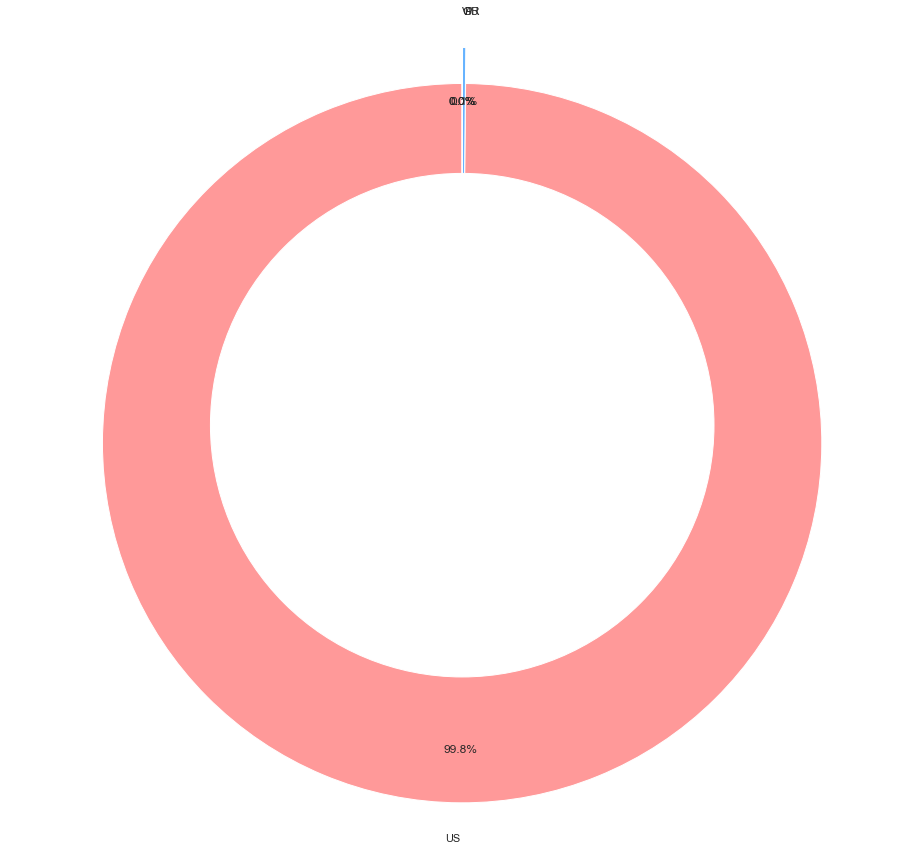

In [84]:
# Donut pie chart for the country based on orders
# Pie chart data used
label = country_orders['Country']
sizes = country_orders['ordersplaced']

# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots(figsize=(13, 12))
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

ax1.pie(sizes, colors = colors, labels = label, startangle = 90, explode = explode, autopct = '%1.1f%%', pctdistance = 0.85)

# Draw circle in the middle 
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect allows the pie to be drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()


In [70]:
train.head()

,ClientId,City,State,Country,ordersplaced,differentpurchases,itemspurchased,maxorders,totalorders,lasthm,firsthm,lastYear,lastmonth,lastday,firstYear,firstmonth,firstday,lastweekday,firstweekday
0,29.0,ASPERS,PA,US,2.0,1.0,2.0,2.0,27.97,18:36,9:44,2019,03,15,2017,06,01,Fri,Thu
1,48.0,ELIZABETHTOWN,KY,US,9.0,1.0,9.0,9.0,123.85,1:49,12:57,2019,07,18,2017,06,23,Thu,Fri
2,63.0,BOCA RATON,FL,US,4.0,1.0,4.0,4.0,57.92,16:16,6:59,2018,06,17,2017,06,16,Sun,Fri
3,125.0,San Francisco,CA,US,1.0,1.0,1.0,1.0,14.98,17:47,21:02,2018,01,11,2017,06,27,Thu,Tue
4,136.0,EDEN,UT,US,1.0,1.0,1.0,1.0,31.99,10:10,16:31,2019,07,16,2017,06,27,Tue,Tue


In [89]:
state_data = train.groupby('State')['ordersplaced'].sum().sort_values(ascending=False).reset_index()
state_data

,State,ordersplaced
0,CA,7875.0
1,NY,3420.0
2,FL,2990.0
3,TX,2589.0
4,WA,1802.0
5,NJ,1550.0
6,IL,1389.0
7,PA,1364.0
8,MA,1172.0
9,VA,1099.0


In [97]:
# Making a new Data frame for visualization of the states with smaller than 402 into 'others'
state_data2 = state_data[:25].copy()

new_row = pd.DataFrame(data = {
    'State' : ['others'],
    'ordersplaced' : [state_data['ordersplaced'][25:].sum()]
})
state_data2 = pd.concat([state_data2, new_row]).reset_index()

In [98]:
state_data2

,index,State,ordersplaced
0,0,CA,7875.0
1,1,NY,3420.0
2,2,FL,2990.0
3,3,TX,2589.0
4,4,WA,1802.0
5,5,NJ,1550.0
6,6,IL,1389.0
7,7,PA,1364.0
8,8,MA,1172.0
9,9,VA,1099.0


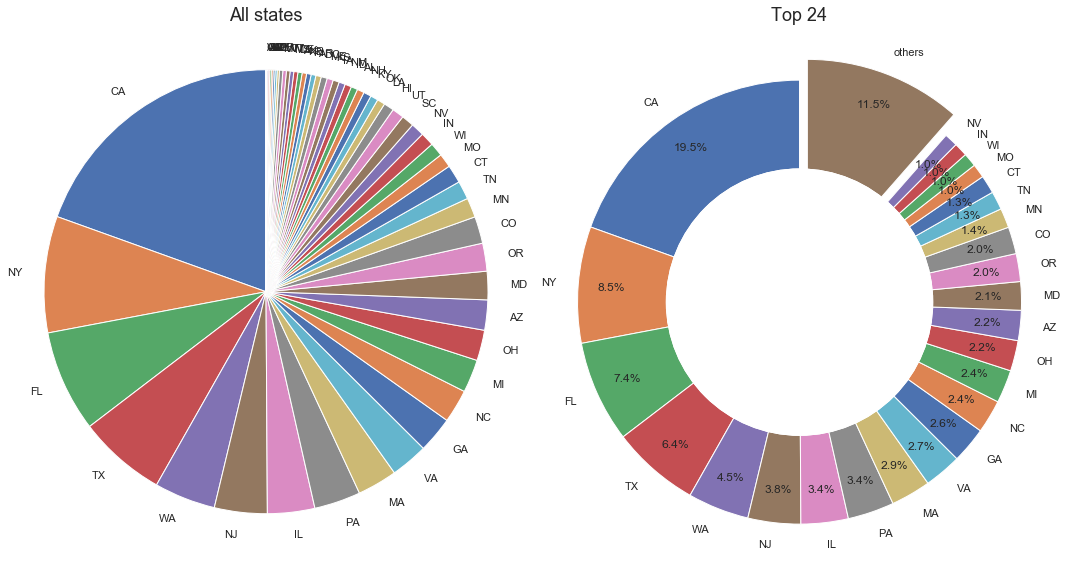

In [117]:
# Pie chart with two charts for comparison
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

labels1 = state_data['State']
sizes1 = state_data['ordersplaced']
labels2 = state_data2['State']
sizes2 = state_data2['ordersplaced']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
ax[0].pie(sizes1, labels=labels1, startangle=90, pctdistance = 0.85)

ax[1].pie(sizes2, labels=labels2, startangle=90, pctdistance = 0.85, autopct='%1.1f%%', explode = explode)


centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax[0].set_title('All states', size=18)
ax[1].set_title('Top 24', size=18)

ax[0].axis('equal')
ax[1].axis('equal')
plt.tight_layout()
plt.show()


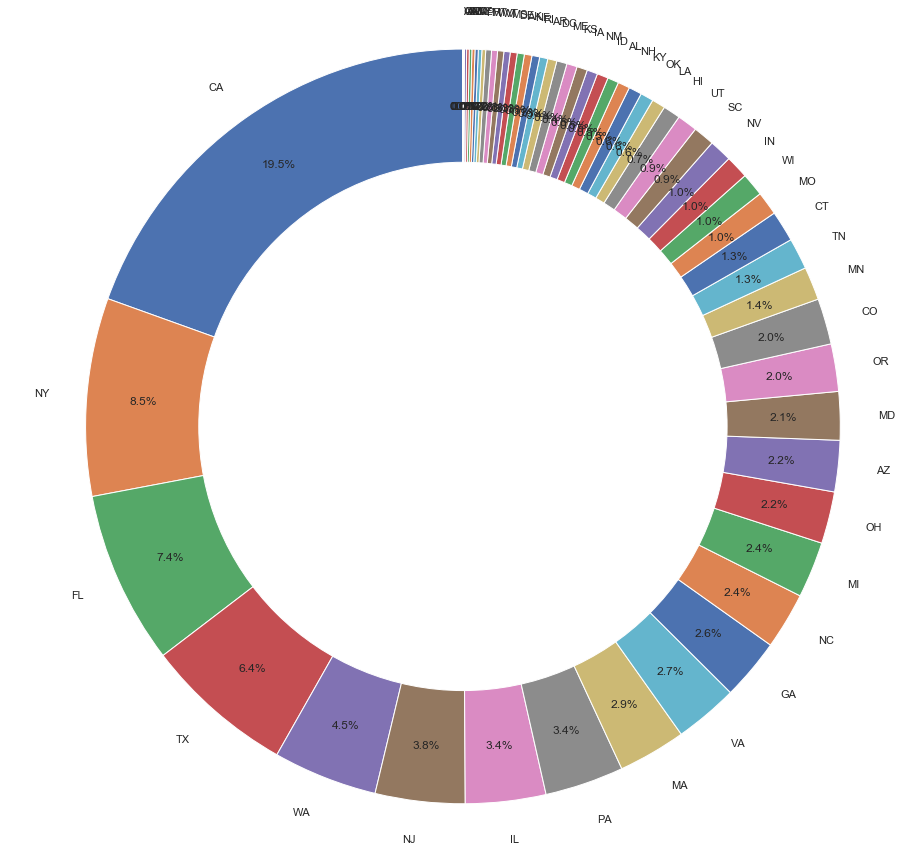

In [109]:
# Pie chart of different states based on orders for easier visualization

labels = state_data['State']
sizes = state_data['ordersplaced']

fig, ax = plt.subplots(figsize=(13, 12))

ax.pie(sizes, labels = labels, startangle = 90, autopct='%1.1f%%', pctdistance = 0.85)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()